In [1]:
#importer des bibliothèques nécessaires 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#chargement des données d'entrainement et de test 
train_data = pd.read_csv('/Users/diane/Desktop/Gestion des BDD Thierry VALLAUD/Projet/Titanic-master/data/train.csv')
test_data = pd.read_csv('/Users/diane/Desktop/Gestion des BDD Thierry VALLAUD/Projet/Titanic-master/data/test.csv')

#Exploration de la donnée 
#afficher les 5 premières lignes du dataset d'entrainement 
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Résumé statistique des variables numériques des données d'entrainement 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#vérification si il y a des données manquantes dans le dataset d'entrainement 
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Calcul du pourcentage de valeurs nulles dans les colonnes "Age" et "Cabin"
print("Pourcentage de valeurs nulles dans la colonne Age :", train_data["Age"].isnull().sum() / len(train_data["Age"]) * 100, "%")
print("Pourcentage de valeurs nulles dans la colonne Cabin :", train_data["Cabin"].isnull().sum() / len(train_data["Cabin"]) * 100, "%")


Pourcentage de valeurs nulles dans la colonne Age : 19.865319865319865 %
Pourcentage de valeurs nulles dans la colonne Cabin : 77.10437710437711 %


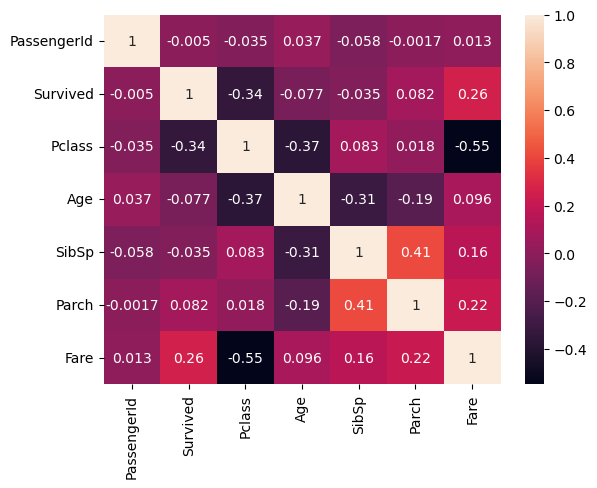

In [5]:
#réalisation d'une matrice de corrélation entre les différentes variables numériques 
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [6]:
# Calculer le pourcentage de survivants pour chaque tarif
survived_by_tarif = train_data.groupby(['Fare'])['Survived'].mean() * 100

# Afficher les tarifs avec les pourcentages de survie les plus élevés et les plus bas
highest_survival = survived_by_tarif.nlargest(5)
lowest_survival = survived_by_tarif.nsmallest(5)

# Afficher les résultats
print("Tarifs avec les pourcentages de survie les plus élevés :")
print(highest_survival)
print("\nTarifs avec les pourcentages de survie les plus bas :")
print(lowest_survival)

Tarifs avec les pourcentages de survie les plus élevés :
Fare
7.1417    100.0
7.7875    100.0
7.8792    100.0
8.0292    100.0
8.1125    100.0
Name: Survived, dtype: float64

Tarifs avec les pourcentages de survie les plus bas :
Fare
4.0125    0.0
5.0000    0.0
6.2375    0.0
6.4375    0.0
6.4500    0.0
Name: Survived, dtype: float64


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


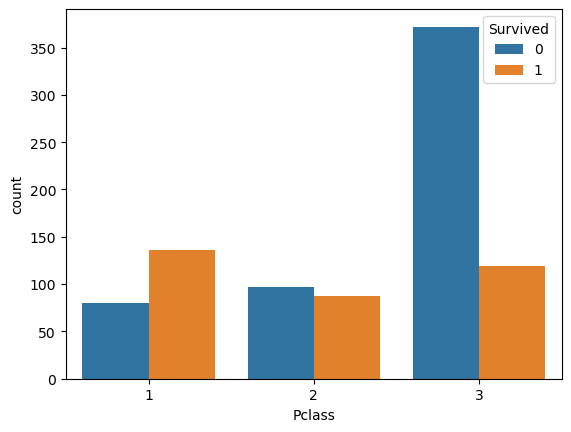

In [7]:
# Calculer le nombre de survivants pour chaque groupe de classe 
sns.countplot(x='Pclass', hue='Survived', data=train_data)
survived_by_class = train_data.groupby(['Pclass'])['Survived'].mean() * 100
print(survived_by_class)

Parch
0    34.365782
1    55.084746
2    50.000000
3    60.000000
4     0.000000
5    20.000000
6     0.000000
Name: Survived, dtype: float64


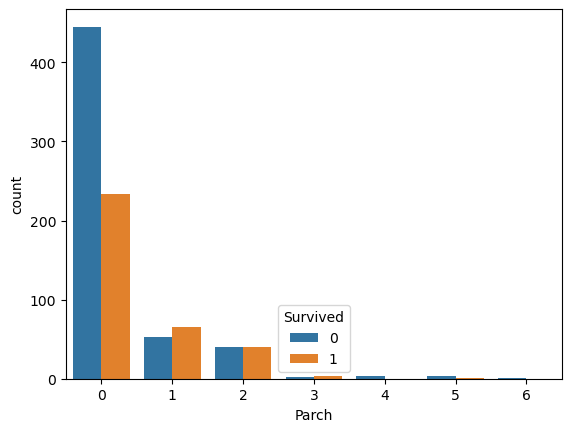

In [8]:
# Calculer le nombre de survivants pour chaque taille de famille  
sns.countplot(x='Parch', hue='Survived', data=train_data)
survived_by_parch = train_data.groupby(['Parch'])['Survived'].mean() * 100
print(survived_by_parch)

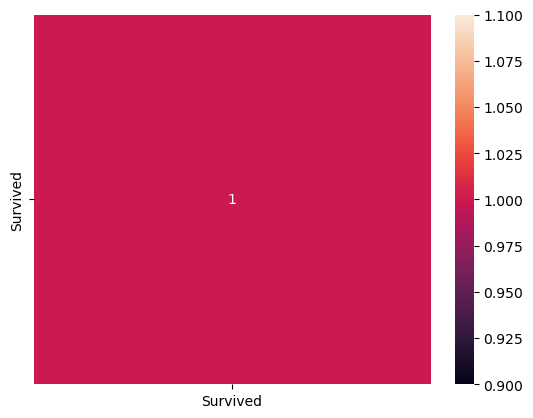

In [9]:
# Matrice de corrélation pour les variables catégorielles
cat_corr = train_data[['Sex', 'Embarked', 'Survived']].corr()
sns.heatmap(cat_corr, annot=True)
plt.show()

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


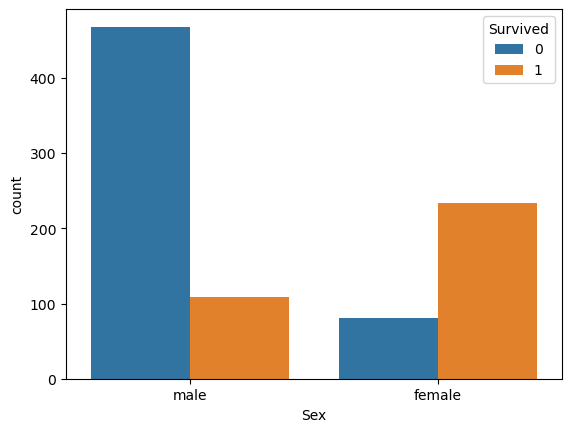

In [10]:
# Calculer le nombre de survivants pour chaque groupe de sexe
sns.countplot(x='Sex', hue='Survived', data=train_data )  
survived_by_sex = train_data.groupby(['Sex'])['Survived'].mean() * 100
print(survived_by_sex)
    

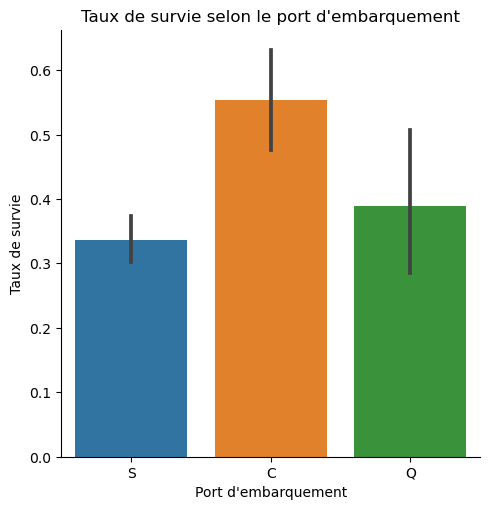

In [11]:
# Affichage du taux de survie selon le port d'embarquement 
tx_survie = sns.catplot(x='Embarked', y='Survived', data=train_data, kind='bar')
tx_survie.set(xlabel='Port d\'embarquement', ylabel='Taux de survie', title='Taux de survie selon le port d\'embarquement')


In [12]:
# nettoyer les données d'entraînement 
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data = train_data.dropna()
train_data['Sex'] = train_data['Sex'].map({'female': 1, 'male': 0})
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train_data = train_data.astype({'Embarked': 'int'})

# créer le modèle d'arbre de décision et entraîner le modèle avec les données d'entraînement
dt = DecisionTreeClassifier(max_depth=3)

X_train = train_data.drop(['Survived'], axis=1)
y_train = train_data['Survived']
dt.fit(X_train, y_train)

# nettoyer les données de test 
test_passenger_ids = test_data['PassengerId']
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data = test_data.fillna(0)  # remplacer toutes les valeurs manquantes restantes par 0
test_data['Sex'] = test_data['Sex'].map({'female': 1, 'male': 0})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data = test_data.astype({'Embarked': 'int'})

# faire des prédictions sur les données de test
prediction_test_data = dt.predict(test_data)

# créer un dataframe pour les prédictions
output_prediction = pd.DataFrame({'PassengerId': test_passenger_ids, 'Survived': prediction_test_data})

# enregistrer les prédictions dans un fichier CSV
output_prediction.to_csv('predictions.csv', index=False)


In [16]:
# compter le nombre de survivants dans les prédictions
num_survivors = sum(prediction_test_data)

# calculer le pourcentage de survivants
percent_survivors = num_survivors / len(prediction_test_data) * 100

# afficher le pourcentage de survivants
print("Pourcentage de survivants dans le jeu de données de test : {:.2f}%".format(percent_survivors))


Pourcentage de survivants dans le jeu de données de test : 35.89%


In [18]:
# nombre de survivants dans le dataset de test
num_survivors = sum(prediction_test_data)
print("Nombre de survivants dans le dataset de test :", num_survivors)


Nombre de survivants dans le dataset de test : 150


In [19]:
total_passengers = test_data.shape[0]
print("Nombre total de passagers dans le dataset de test: ", total_passengers)


Nombre total de passagers dans le dataset de test:  418


AgeGroup
0-10     59.375000
10-20    38.260870
20-30    33.415233
30-40    44.155844
40-50    38.372093
50-60    40.476190
60-70    18.750000
70-80    20.000000
80-90          NaN
Name: Survived, dtype: float64


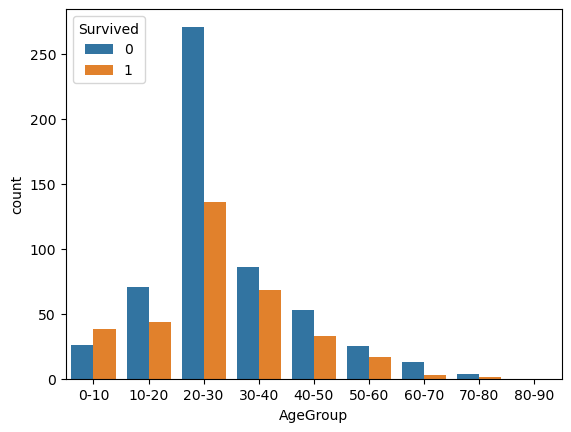

In [20]:
# Regrouper les âges par tranches d'âge
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'] #création de groupe d'âge afin d'améliorer la lisibilité des résultats 
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels)

# Afficher le countplot avec les tranches d'âge 
sns.countplot(x='AgeGroup', hue='Survived', data=train_data)

# Calculer le pourcentage de survivants pour chaque groupe d'âge 
survived_by_age = train_data.groupby(['AgeGroup'])['Survived'].mean() * 100

# Afficher les pourcentages de survivants par groupe d'âge 
print(survived_by_age)
